Caio de Lima Saigg, 254677

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.api.types as ptypes
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IMLDS/gym_members_exercise_tracking.csv")
df.info()
NUMERICAL_FEATURES = [col for col in df.columns if ptypes.is_numeric_dtype(df[col])]
CONTINUOUS_FEATURES = [x for x in NUMERICAL_FEATURES if x != 'Experience_Level']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Dimension reduction

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(CONTINUOUS_FEATURES))
pca.fit(df[CONTINUOUS_FEATURES])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
merged_feature = pca.transform(df[CONTINUOUS_FEATURES])

[9.86350958e-01 6.37562449e-03 2.51319462e-03 1.86412784e-03
 1.74585724e-03 7.06317015e-04 2.93585942e-04 1.41533225e-04
 6.14487538e-06 2.59051632e-06 5.67408433e-08 9.86653613e-09]
[8.50275442e+03 6.83605055e+02 4.29197280e+02 3.69642371e+02
 3.57724153e+02 2.27532655e+02 1.46693722e+02 1.01852830e+02
 2.12226905e+01 1.37796145e+01 2.03935012e+00 8.50405882e-01]


In [ ]:
print('Variance for each feature:')
print('--------------------------')

data = {}

for z in range (len(CONTINUOUS_FEATURES)):
  name = f"New feature {z}"
  data[name] = np.var(merged_feature[z])

for key in CONTINUOUS_FEATURES:
  data[key] = df[key].var()

max_desc_length = max(len(desc) for desc in data.keys())

for desc, value in data.items():
    print(f"{desc:<{max_desc_length}}: {value}")

Variance for each feature:
--------------------------
New feature 0                : 12538.541840174983
New feature 1                : 61.82647667592469
New feature 2                : 3922.7859003724666
New feature 3                : 10617.116312673845
New feature 4                : 9375.820897594604
New feature 5                : 3447.696414686661
New feature 6                : 17572.43722955109
New feature 7                : 23.409745345115343
New feature 8                : 2937.5311489110554
New feature 9                : 824.5724736278815
New feature 10               : 7910.069457283273
New feature 11               : 204.9592762649403
Age                          : 148.37500370074312
Weight (kg)                  : 449.7580773899408
Height (m)                   : 0.016312371478478624
Max_BPM                      : 132.84143690338735
Avg_BPM                      : 205.7819352983226
Resting_BPM                  : 53.68580691002749
Session_Duration (hours)     : 0.1176719686684514
Calo

### A higher variance in a principal component suggests that it captures more variability from the original data, making it more significant in terms of information retention. If we choose to keep the components with a variance higher than 5000, for example, we can reduce the quantity of continuous feautures from 12 to 4.

### Higher variance in a feature (like Calories_Burned and Weight) indicates that these features vary widely across the data points, possibly contributing more to the total variance captured by the principal components.

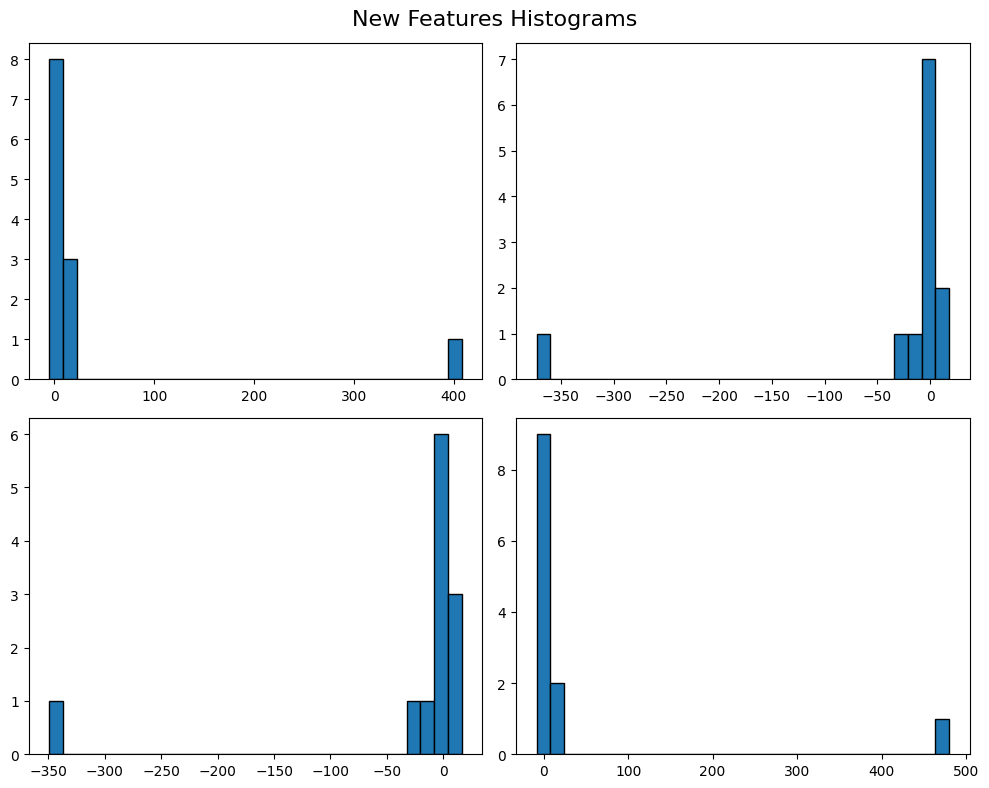

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0,0].hist(merged_feature[0], bins=30, edgecolor='black')
ax[0,1].hist(merged_feature[3], bins=30, edgecolor='black')
ax[1,0].hist(merged_feature[4], bins=30, edgecolor='black')
ax[1,1].hist(merged_feature[6], bins=30, edgecolor='black')

fig.suptitle("New Features Histograms", fontsize=16)
plt.tight_layout()
plt.show()

## t-SNE

(973, 2)
[[ 46.709152  -10.965416 ]
 [ -1.085476   -3.700112 ]
 [-33.988667   -9.217753 ]
 ...
 [  3.7757454   7.6865034]
 [  1.0819552  -3.5301242]
 [-41.198433    9.7648   ]]


Text(0, 0.5, 'Frequency')

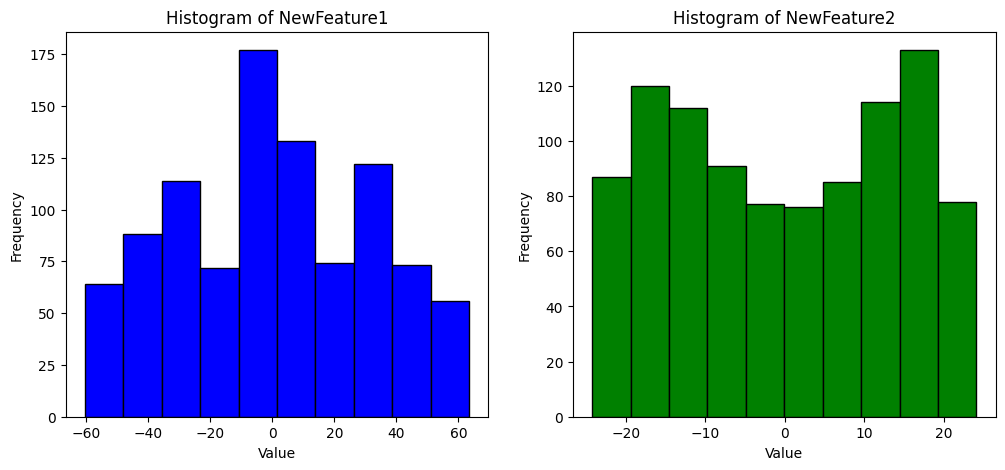

In [ ]:
from sklearn.manifold import TSNE

features2reduce = ['Max_BPM','Avg_BPM','Resting_BPM','Calories_Burned']
merged_features = TSNE(n_components=2).fit_transform(df[features2reduce])
print(merged_features.shape)
print(merged_features)
nf1 = merged_features[:,0]
nf2 = merged_features[:,1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(nf1, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of NewFeature1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(nf2, bins=10, color='green', edgecolor='black')
plt.title('Histogram of NewFeature2')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
data = {
    "Variance of the new feature 1": np.var(nf1),
    "Variance of the new feature 2": np.var(nf2),
    "Max BPM variance": df['Max_BPM'].var(),
    "Avg BPM variance": df['Avg_BPM'].var(),
    "Resting BPM variance": df['Resting_BPM'].var(),
    "Calories Burned variance": df['Calories_Burned'].var()
}

max_desc_length = max(len(desc) for desc in data.keys())

for desc, value in data.items():
    print(f"{desc:<{max_desc_length}}: {value}")

Variance of the new feature 1: 997.6852416992188
Variance of the new feature 2: 200.22584533691406
Max BPM variance             : 132.84143690338735
Avg BPM variance             : 205.7819352983226
Resting BPM variance         : 53.68580691002749
Calories Burned variance     : 74333.39649338728


### The first new feature captures most of the meaningful variance, suggesting it reflects the underlying structure of the original features well. The second new feature adds some additional information but is not as influential as the first.

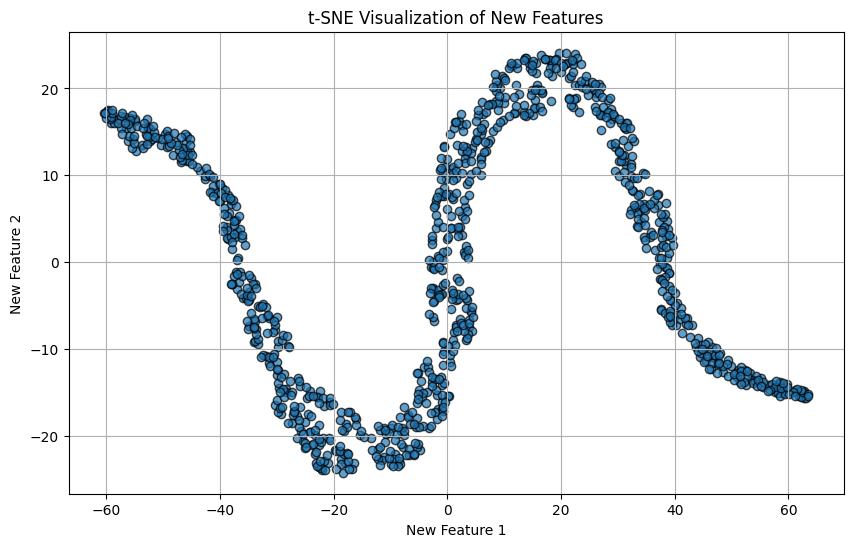

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(nf1, nf2, alpha=0.7, edgecolors='k')
plt.title('t-SNE Visualization of New Features')
plt.xlabel('New Feature 1')
plt.ylabel('New Feature 2')
plt.grid()
plt.show()

# Feature selection

## Variance thresholding

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.5)
selectedDF = selector.fit_transform(df[CONTINUOUS_FEATURES])
print(df[CONTINUOUS_FEATURES].shape)
print(selectedDF.shape)

original_features = df[CONTINUOUS_FEATURES].columns
kept_indices = selector.get_support(indices=True)

# Get the names of the features kept
kept_features = original_features[kept_indices]

print("Original Features:", original_features.tolist())
print("Kept Features:", kept_features.tolist())


(973, 12)
(973, 9)
Original Features: ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']
Kept Features: ['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)', 'BMI']


[texto do link](https://)## SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

numerical_features = df[CONTINUOUS_FEATURES].columns
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(df[CONTINUOUS_FEATURES], df['Experience_Level'])
selected_indices = selector.get_support(indices=True)
selected_features = numerical_features[selected_indices]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)']


### To be able to use SelectKBest we are using Experience_Level as our label. The top 5 best features were then selected using f_regression, which helps identify which features are most linearly related to the target.

## Chi2

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

data_encoded = df.apply(LabelEncoder().fit_transform)

scaler = MinMaxScaler()
for key in df.keys():
  if ptypes.is_numeric_dtype(data_encoded[key]):
    negValues = data_encoded.loc[data_encoded[key] < 0]
    if len(negValues) > 0:
      data_encoded[key] = pd.DataFrame(scaler.fit_transform(data_encoded[key]), columns=data_encoded[key])
      print("column changed")

features = [key for key in data_encoded.keys() if key != 'Experience_Level']
chi2_scores, p_values = chi2(data_encoded[features], df['Experience_Level'])

for feature, score, p_value in zip(data_encoded[features].columns, chi2_scores, p_values):
    print(f"Feature: {feature}, Chi-squared Score: {score}, p-value: {p_value}")

Feature: Age, Chi-squared Score: 2.459218208532861, p-value: 0.292406855936415
Feature: Gender, Chi-squared Score: 0.00609589101232635, p-value: 0.9969566947641136
Feature: Weight (kg), Chi-squared Score: 152.42667635032262, p-value: 7.961002917944305e-34
Feature: Height (m), Chi-squared Score: 6.247078111672703, p-value: 0.044001169941564895
Feature: Max_BPM, Chi-squared Score: 6.79687106287835, p-value: 0.033425522254829365
Feature: Avg_BPM, Chi-squared Score: 6.678617359263637, p-value: 0.03546146448229336
Feature: Resting_BPM, Chi-squared Score: 1.4489051830194835, p-value: 0.48458976491508676
Feature: Session_Duration (hours), Chi-squared Score: 9388.669357991412, p-value: 0.0
Feature: Calories_Burned, Chi-squared Score: 42812.613765004455, p-value: 0.0
Feature: Workout_Type, Chi-squared Score: 2.3228816739111253, p-value: 0.31303482365230545
Feature: Fat_Percentage, Chi-squared Score: 16187.817803038637, p-value: 0.0
Feature: Water_Intake (liters), Chi-squared Score: 523.65758893

### Since Chi2 is only usable with non-negative data, we first use LabelEncoder to change categorical data into numerical, then we use MinMaxScaler on any column that might contain negative values (in our case, none). We again are using Experience_Level as our label. Features with higher Chi2 score indicate strong correlation with the target variable.

### Based on the p_value, we can conclude that from the 14 features used to predict the Experience_Level, 10 of them show significant association.

### By selecting the 5 features with the highest Chi-square score, we end up with Calories_Burned, Fat_Percentage, Session_Duration, Water_Intake and Workout_Frequency. The same ones found by SelectKBest.

## R_regression

In [ ]:
from sklearn.feature_selection import r_regression

regression_features = [x for x in CONTINUOUS_FEATURES if x != 'Calories_Burned']
R = r_regression(df[regression_features], df['Calories_Burned'])
for feature, r in zip(regression_features,R):
  print(f"Feature: {feature}, R_regression: {r}")

Feature: Age, R_regression: -0.15467875992928573
Feature: Weight (kg), R_regression: 0.09544347301217067
Feature: Height (m), R_regression: 0.08634805107492123
Feature: Max_BPM, R_regression: 0.0020900159185365274
Feature: Avg_BPM, R_regression: 0.33965866723022325
Feature: Resting_BPM, R_regression: 0.016517950741932897
Feature: Session_Duration (hours), R_regression: 0.9081403755270204
Feature: Fat_Percentage, R_regression: -0.5976152476508009
Feature: Water_Intake (liters), R_regression: 0.3569306830046408
Feature: Workout_Frequency (days/week), R_regression: 0.5761501254548657
Feature: BMI, R_regression: 0.059760826143506605


### This function computes the Pearson correlation coefficient for each features and the target. The closer to 1 or -1 the stronger the correlation.

### The 5 features with stronger correlation are Session_Duration, Fat_Percentage, Workout_Frequency, Water_Intake and Avg_BPM. They are not the same ones found by the other methods because now we have a different label, 'Calories_Burned', since r_regresion computes the Pearson correlation coefficient between continuous features and a continuous target variable.

## SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

selector = SelectFromModel(estimator=GradientBoostingClassifier()).fit(df[CONTINUOUS_FEATURES], df['Experience_Level'])
selector.transform(df[CONTINUOUS_FEATURES])
selected_features = df[CONTINUOUS_FEATURES].columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Session_Duration (hours)', 'Workout_Frequency (days/week)'], dtype='object')


### Before using SelecFromModel we train a model, which in this case is a GradientBoostingClassifier. SelectFromModel then selects features that have importance scores above the chosen threshold, which by default is the mean importance.

# Feature preprocessing

## Normalization

In [ ]:
statistics = df[CONTINUOUS_FEATURES].describe().transpose()  # This provides mean, min, max, std, etc.
statistics['variance'] = df[CONTINUOUS_FEATURES].var()

print(statistics[['mean', 'min', 'max', 'std', 'variance']])

                                     mean     min      max         std  \
Age                             38.683453   18.00    59.00   12.180928   
Weight (kg)                     73.854676   40.00   129.90   21.207500   
Height (m)                       1.722580    1.50     2.00    0.127720   
Max_BPM                        179.883864  160.00   199.00   11.525686   
Avg_BPM                        143.766701  120.00   169.00   14.345101   
Resting_BPM                     62.223022   50.00    74.00    7.327060   
Session_Duration (hours)         1.256423    0.50     2.00    0.343033   
Calories_Burned                905.422405  303.00  1783.00  272.641516   
Fat_Percentage                  24.976773   10.00    35.00    6.259419   
Water_Intake (liters)            2.626619    1.50     3.70    0.600172   
Workout_Frequency (days/week)    3.321686    2.00     5.00    0.913047   
BMI                             24.912127   12.32    49.84    6.660879   

                                   va

In [ ]:
from sklearn.preprocessing import normalize

auxdf = df[CONTINUOUS_FEATURES].copy()
auxdf[CONTINUOUS_FEATURES] = normalize(df[CONTINUOUS_FEATURES])
print("Normalization per sample:")

statistics = auxdf[CONTINUOUS_FEATURES].describe().transpose()  # This provides mean, min, max, std, etc.
statistics['variance'] = auxdf[CONTINUOUS_FEATURES].var()

print(statistics[['mean', 'min', 'max', 'std', 'variance']])

Normalization per sample:
                                   mean       min       max       std  \
Age                            0.045033  0.010639  0.133481  0.021339   
Weight (kg)                    0.084296  0.034345  0.281161  0.035204   
Height (m)                     0.001979  0.000943  0.004293  0.000624   
Max_BPM                        0.206958  0.097434  0.462242  0.065494   
Avg_BPM                        0.163845  0.090204  0.342964  0.048137   
Resting_BPM                    0.071616  0.030194  0.181193  0.024118   
Session_Duration (hours)       0.001338  0.000948  0.001800  0.000158   
Calories_Burned                0.950767  0.781087  0.988895  0.034421   
Fat_Percentage                 0.029773  0.005656  0.080352  0.013370   
Water_Intake (liters)          0.002963  0.001273  0.008325  0.001011   
Workout_Frequency (days/week)  0.003651  0.001500  0.007736  0.000988   
BMI                            0.028518  0.010721  0.085544  0.011659   

                        

In [ ]:
from sklearn.preprocessing import normalize

auxdf = df[CONTINUOUS_FEATURES].copy()
auxdf[CONTINUOUS_FEATURES] = normalize(df[CONTINUOUS_FEATURES], axis=0)
print("Normalization per feature:")

statistics = auxdf[CONTINUOUS_FEATURES].describe().transpose()  # This provides mean, min, max, std, etc.
statistics['variance'] = auxdf[CONTINUOUS_FEATURES].var()

print(statistics[['mean', 'min', 'max', 'std', 'variance']])

Normalization per feature:
                                   mean       min       max       std  \
Age                            0.030580  0.014229  0.046640  0.009629   
Weight (kg)                    0.030815  0.016689  0.054198  0.008848   
Height (m)                     0.031971  0.027840  0.037120  0.002370   
Max_BPM                        0.031993  0.028457  0.035393  0.002050   
Avg_BPM                        0.031900  0.026627  0.037499  0.003183   
Resting_BPM                    0.031839  0.025584  0.037865  0.003749   
Session_Duration (hours)       0.030928  0.012308  0.049231  0.008444   
Calories_Burned                0.030698  0.010273  0.060453  0.009244   
Fat_Percentage                 0.031098  0.012451  0.043577  0.007793   
Water_Intake (liters)          0.031254  0.017848  0.044026  0.007141   
Workout_Frequency (days/week)  0.030913  0.018613  0.046532  0.008497   
BMI                            0.030972  0.015317  0.061963  0.008281   

                       

### Normalization resizes your features to a common scale, so that they contribute equally to the model.

Text(0, 0.5, 'Frequency')

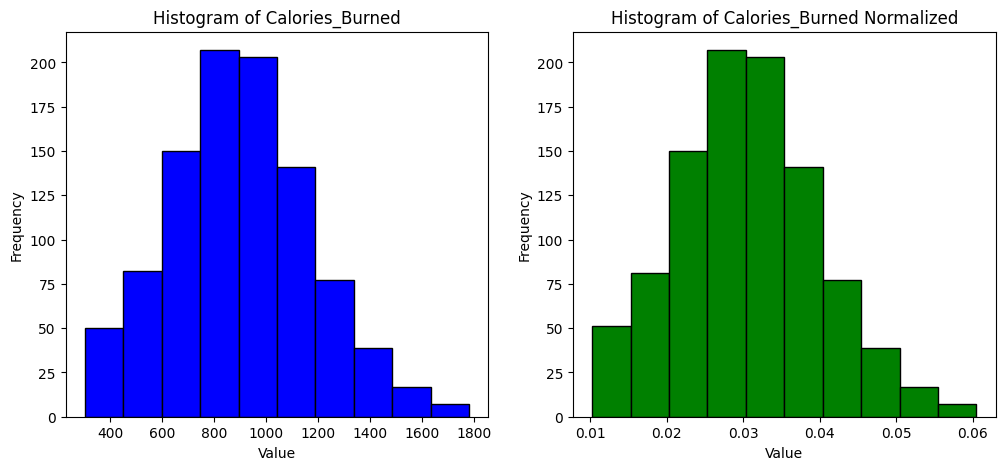

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['Calories_Burned'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Calories_Burned')
plt.xlabel('Value')
plt.ylabel('Frequency')

auxdf = df[CONTINUOUS_FEATURES].copy()
auxdf[CONTINUOUS_FEATURES] = normalize(df[CONTINUOUS_FEATURES], axis=0)

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(auxdf['Calories_Burned'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Calories_Burned Normalized')
plt.xlabel('Value')
plt.ylabel('Frequency')

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

auxdf = df[CONTINUOUS_FEATURES].copy()
scaler = StandardScaler()
scaler.fit(df[CONTINUOUS_FEATURES])
auxdf[CONTINUOUS_FEATURES] = scaler.transform(df[CONTINUOUS_FEATURES])
statistics = auxdf[CONTINUOUS_FEATURES].describe().transpose()  # This provides mean, min, max, std, etc.
statistics['variance'] = auxdf[CONTINUOUS_FEATURES].var()

print(statistics[['mean', 'min', 'max', 'std', 'variance']])

                                       mean       min       max       std  \
Age                            1.350981e-16 -1.698893  1.668756  1.000514   
Weight (kg)                   -2.345959e-16 -1.597175  2.644071  1.000514   
Height (m)                    -8.324961e-16 -1.743613  2.173217  1.000514   
Max_BPM                       -7.266085e-16 -1.726066  1.659421  1.000514   
Avg_BPM                       -6.672748e-16 -1.657634  1.759923  1.000514   
Resting_BPM                   -1.830213e-16 -1.669061  1.608153  1.000514   
Session_Duration (hours)      -6.572338e-17 -2.206235  2.168765  1.000514   
Calories_Burned                8.489270e-17 -2.210713  3.220452  1.000514   
Fat_Percentage                -2.610679e-16 -2.393908  1.602127  1.000514   
Water_Intake (liters)          2.884526e-16 -1.878125  1.789376  1.000514   
Workout_Frequency (days/week) -1.022364e-16 -1.448299  1.839092  1.000514   
BMI                           -1.533545e-16 -1.891432  3.744354  1.000514   

Text(0, 0.5, 'Frequency')

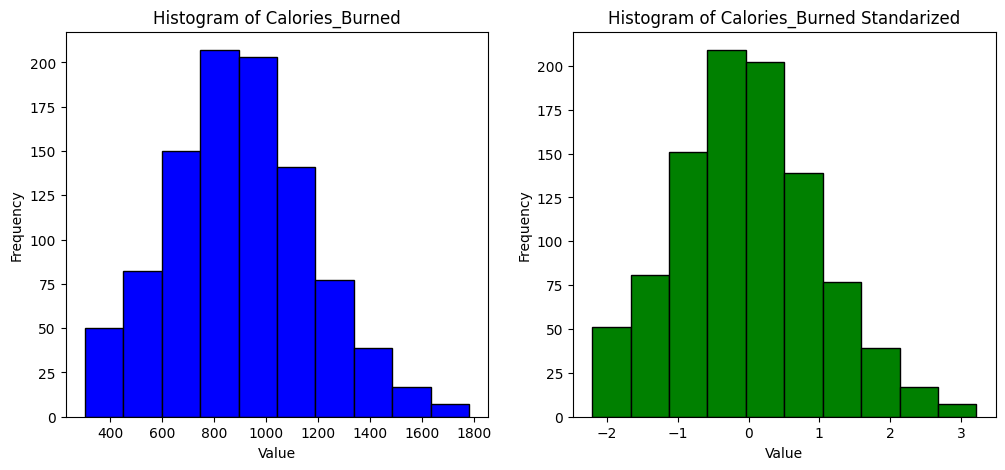

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['Calories_Burned'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Calories_Burned')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(auxdf['Calories_Burned'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Calories_Burned Standarized')
plt.xlabel('Value')
plt.ylabel('Frequency')

### Standarization scales the features to have a mean of 0 and a standard deviation of 1, as can be seen from the statistics function return. Other than that, each feature maintain its distribution.

### Standarization is less victim to outliers than Normalization is, and is quite useful when our data is also not bounded.

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

auxdf = df[CONTINUOUS_FEATURES].copy()
scaler = MinMaxScaler()
scaler.fit(df[CONTINUOUS_FEATURES])
auxdf[CONTINUOUS_FEATURES] = scaler.transform(df[CONTINUOUS_FEATURES])
statistics = auxdf[CONTINUOUS_FEATURES].describe().transpose()  # This provides mean, min, max, std, etc.
statistics['variance'] = auxdf[CONTINUOUS_FEATURES].var()

print(statistics[['mean', 'min', 'max', 'std', 'variance']])

                                   mean  min  max       std  variance
Age                            0.504474  0.0  1.0  0.297096  0.088266
Weight (kg)                    0.376581  0.0  1.0  0.235901  0.055649
Height (m)                     0.445159  0.0  1.0  0.255440  0.065249
Max_BPM                        0.509843  0.0  1.0  0.295530  0.087338
Avg_BPM                        0.485035  0.0  1.0  0.292757  0.085707
Resting_BPM                    0.509293  0.0  1.0  0.305294  0.093205
Session_Duration (hours)       0.504282  0.0  1.0  0.228689  0.052299
Calories_Burned                0.407042  0.0  1.0  0.184217  0.033936
Fat_Percentage                 0.599071  0.0  1.0  0.250377  0.062689
Water_Intake (liters)          0.512099  0.0  1.0  0.272805  0.074423
Workout_Frequency (days/week)  0.440562  0.0  1.0  0.304349  0.092628
BMI                            0.335611  0.0  1.0  0.177529  0.031516


Text(0, 0.5, 'Frequency')

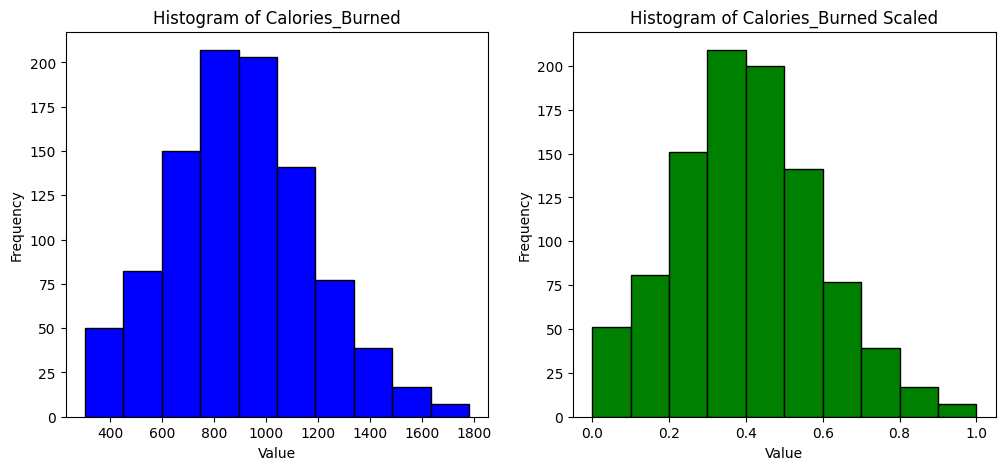

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['Calories_Burned'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Calories_Burned')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(auxdf['Calories_Burned'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Calories_Burned Scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')

### Scaling works the same way as Normalization.

## Encoding categorical features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

auxdf = df[[x for x in df.keys() if x not in NUMERICAL_FEATURES]].copy()
enc = OrdinalEncoder()
enc.fit(df[[x for x in df.keys() if x not in NUMERICAL_FEATURES]])
auxdf[[x for x in df.keys() if x not in NUMERICAL_FEATURES]] = enc.transform(df[[x for x in df.keys() if x not in NUMERICAL_FEATURES]])
print(auxdf)

     Gender  Workout_Type
0       1.0           3.0
1       0.0           1.0
2       0.0           0.0
3       1.0           2.0
4       1.0           2.0
..      ...           ...
968     1.0           2.0
969     1.0           2.0
970     0.0           0.0
971     1.0           1.0
972     1.0           2.0

[973 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def custom_combiner(feature, category):
    return str(feature) + "_" + type(category).__name__ + "_" + str(category)

auxdf = df[[x for x in df.keys() if x not in NUMERICAL_FEATURES]].copy()
enc = OneHotEncoder(handle_unknown='ignore', feature_name_combiner=custom_combiner)
enc.fit(df[[x for x in df.keys() if x not in NUMERICAL_FEATURES]])
auxdf[enc.get_feature_names_out()] = enc.transform(df[[x for x in df.keys() if x not in NUMERICAL_FEATURES]]).toarray()
print(auxdf)


     Gender Workout_Type  Gender_str_Female  Gender_str_Male  \
0      Male         Yoga                0.0              1.0   
1    Female         HIIT                1.0              0.0   
2    Female       Cardio                1.0              0.0   
3      Male     Strength                0.0              1.0   
4      Male     Strength                0.0              1.0   
..      ...          ...                ...              ...   
968    Male     Strength                0.0              1.0   
969    Male     Strength                0.0              1.0   
970  Female       Cardio                1.0              0.0   
971    Male         HIIT                0.0              1.0   
972    Male     Strength                0.0              1.0   

     Workout_Type_str_Cardio  Workout_Type_str_HIIT  \
0                        0.0                    0.0   
1                        0.0                    1.0   
2                        1.0                    0.0   
3          

### One Hot Encoder is better suited for categorical data without any intrinsic order. It preserves all category information without assuming any order, but increases the dimensionality of the data.

### Ordinal Encoder is better suited for categorical data with a meaningful order. It preserves the order among categories if it exists, but Imposes an arbitrary numeric order if none exists.

## Discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='uniform'
)

auxdf = df[CONTINUOUS_FEATURES].copy()
est.fit(df[CONTINUOUS_FEATURES])
auxdf[CONTINUOUS_FEATURES] = est.transform(df[CONTINUOUS_FEATURES])
print(auxdf)


     Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0    4.0          2.0         2.0      2.0      3.0          2.0   
1    3.0          1.0         0.0      2.0      3.0          3.0   
2    1.0          1.0         1.0      0.0      0.0          0.0   
3    0.0          0.0         2.0      3.0      4.0          1.0   
4    2.0          0.0         2.0      3.0      3.0          3.0   
..   ...          ...         ...      ...      ...          ...   
968  0.0          2.0         2.0      3.0      3.0          3.0   
969  0.0          1.0         1.0      3.0      4.0          1.0   
970  4.0          1.0         2.0      4.0      0.0          0.0   
971  1.0          4.0         3.0      4.0      2.0          2.0   
972  3.0          2.0         1.0      0.0      2.0          3.0   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                         3.0              3.0             0.0   
1                         2.0              1.0     

In [ ]:
statistics = auxdf[CONTINUOUS_FEATURES].describe().transpose()  # This provides mean, min, max, std, etc.
statistics['variance'] = auxdf[CONTINUOUS_FEATURES].var()

print(statistics[['mean', 'min', 'max', 'std', 'variance']])

                                   mean  min  max       std  variance
Age                            2.023638  0.0  4.0  1.455957  2.119811
Weight (kg)                    1.387461  0.0  4.0  1.168397  1.365151
Height (m)                     1.764645  0.0  4.0  1.235244  1.525827
Max_BPM                        2.049332  0.0  4.0  1.411895  1.993449
Avg_BPM                        1.928058  0.0  4.0  1.410194  1.988646
Resting_BPM                    2.043165  0.0  4.0  1.425151  2.031057
Session_Duration (hours)       2.026721  0.0  4.0  1.155282  1.334676
Calories_Burned                1.530319  0.0  4.0  0.952771  0.907773
Fat_Percentage                 2.498458  0.0  4.0  1.204949  1.451901
Water_Intake (liters)          2.055498  0.0  4.0  1.336032  1.784983
Workout_Frequency (days/week)  1.741007  0.0  4.0  1.362616  1.856722
BMI                            1.168551  0.0  4.0  0.920926  0.848105


Text(0, 0.5, 'Frequency')

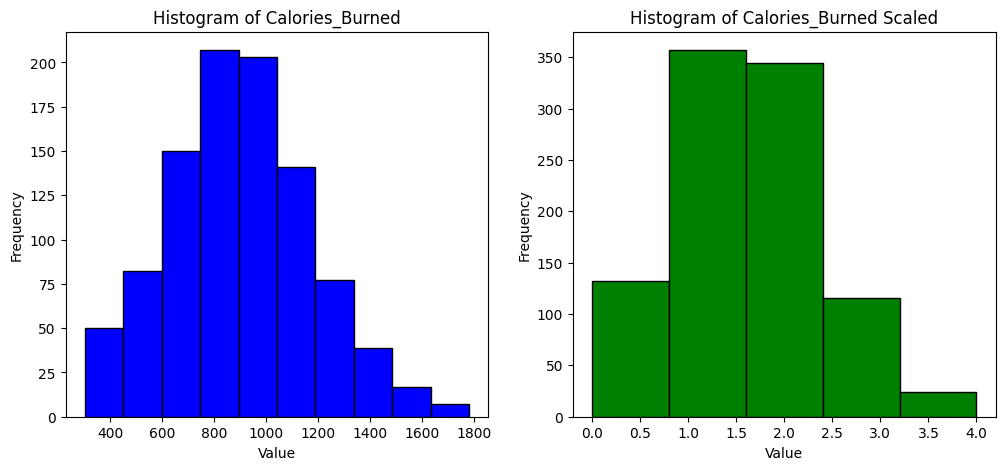

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['Calories_Burned'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Calories_Burned')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(auxdf['Calories_Burned'], bins=5, color='green', edgecolor='black')
plt.title('Histogram of Calories_Burned Scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')

### We can see that Discretization completely changes the distribution of the data and statistics can hardly be applied after it. But it can still be useful to reduce the impact of noise and outliers, and to transform continuous data into ordinal/categorical.

# Clustering

## Kmeans

0      1
1      0
2      2
3      2
4      2
      ..
968    1
969    1
970    0
971    0
972    2
Name: Kmeans, Length: 973, dtype: int32


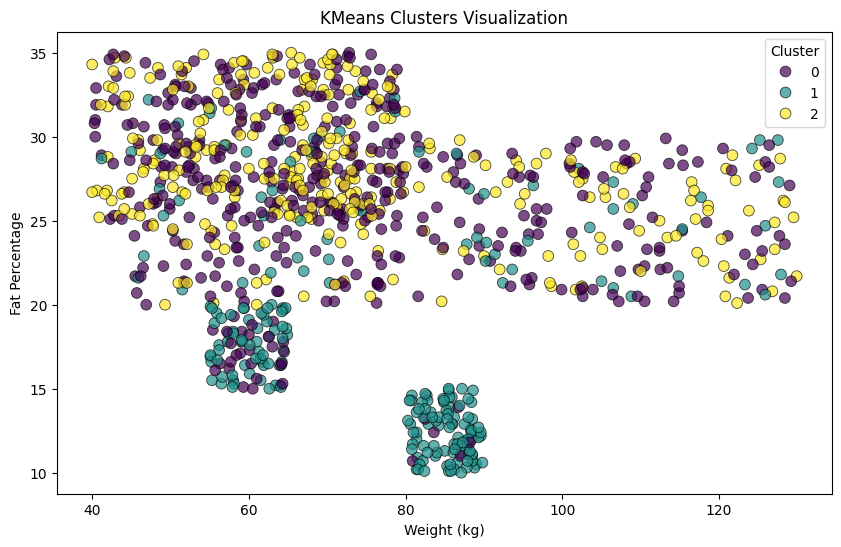

In [ ]:
from sklearn.cluster import KMeans

auxdf = df[CONTINUOUS_FEATURES].copy()
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df[CONTINUOUS_FEATURES])
auxdf['Kmeans'] = kmeans.predict(df[CONTINUOUS_FEATURES])
print(auxdf['Kmeans'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=auxdf['Kmeans'], palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("KMeans Clusters Visualization")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

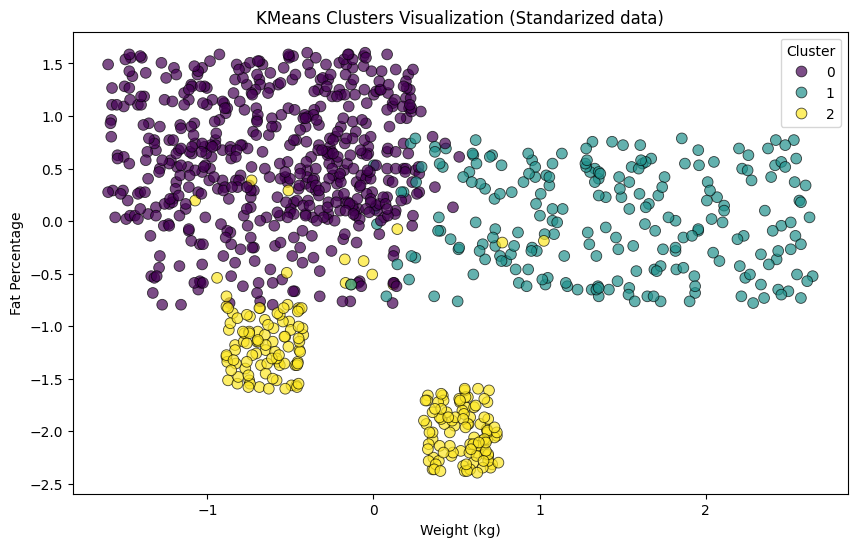

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

auxdf = df[CONTINUOUS_FEATURES].copy()
scaler = StandardScaler()
scaler.fit(df[CONTINUOUS_FEATURES])
auxdf[CONTINUOUS_FEATURES] = scaler.transform(df[CONTINUOUS_FEATURES])
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(auxdf[CONTINUOUS_FEATURES])
auxdf['Kmeans'] = kmeans.predict(auxdf[CONTINUOUS_FEATURES])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=auxdf['Kmeans'], palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("KMeans Clusters Visualization (Standarized data)")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

### Above we managed to see the importance to Standardize/Normalize the data before using KMeans. By ensuring distances are consistent across features, we were able to better clusterize the data.

### We can see how each cluster is defined by proximity.

## DBSCAN

[]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

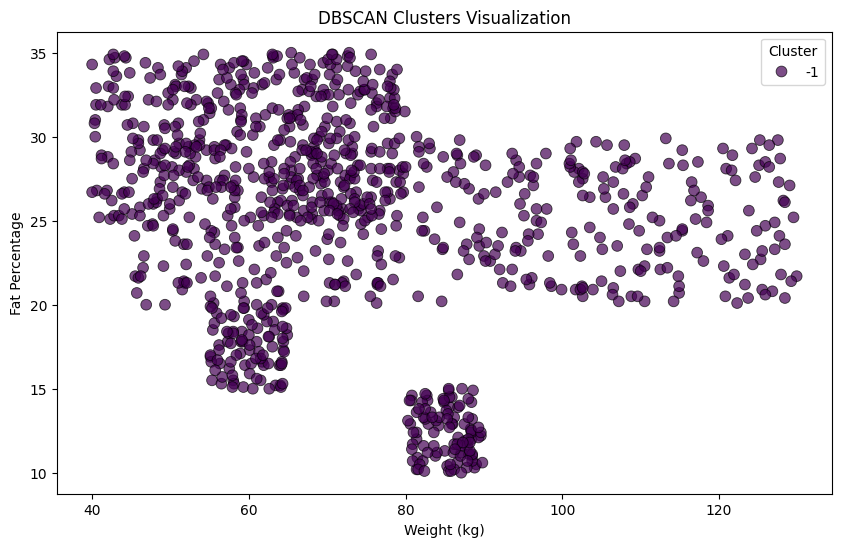

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=6)
labels = db.fit_predict(df[CONTINUOUS_FEATURES])
core_samples = db.core_sample_indices_
print(core_samples)
print(labels)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Weight (kg)'], y=df['Fat_Percentage'], hue=labels, palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("DBSCAN Clusters Visualization")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

Core sample indices: [  0   1   2   7  16  22  24  25  26  28  29  34  36  39  41  48  50  51
  54  57  58  60  62  68  71  73  76  79  81  82  84  87  98 102 110 112
 114 116 117 124 130 132 134 136 138 139 143 145 149 152 153 159 164 166
 167 172 175 178 179 182 184 186 188 189 191 192 196 198 199 200 205 208
 209 211 212 216 217 220 223 225 228 229 231 232 233 235 243 247 252 256
 260 262 263 265 266 267 268 269 272 276 278 281 285 289 290 296 297 307
 309 313 314 315 316 318 319 321 325 329 331 334 336 337 347 350 351 352
 360 362 365 367 372 386 391 395 398 402 415 416 417 418 419 422 432 434
 435 439 442 447 453 457 460 461 466 468 469 471 474 483 484 489 492 496
 497 498 499 501 502 504 505 506 509 511 512 513 514 515 516 520 525 529
 530 531 533 536 538 540 543 544 550 551 555 557 559 560 567 568 572 575
 576 577 578 582 585 587 590 592 596 597 599 600 602 605 608 609 610 611
 612 615 616 617 620 622 625 626 627 629 630 635 638 641 642 652 656 658
 659 663 668 669 670 673 674 6

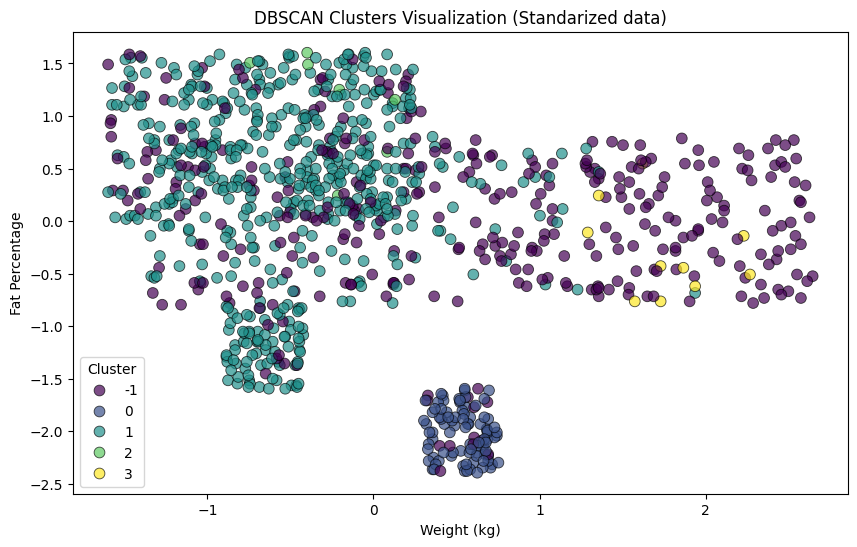

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

auxdf = df[CONTINUOUS_FEATURES].copy()
scaler = StandardScaler()
scaler.fit(df[CONTINUOUS_FEATURES])
auxdf[CONTINUOUS_FEATURES] = scaler.transform(df[CONTINUOUS_FEATURES])
db = DBSCAN(eps=2, min_samples=6)
labels = db.fit_predict(auxdf)
core_samples = db.core_sample_indices_
print("Core sample indices:", core_samples)
print("Cluster labels:", labels)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=labels, palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("DBSCAN Clusters Visualization (Standarized data)")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

### DBSCAN separates the clusters based on the density of the regions. It offers the advantage of identifying and working around outliers.

## Gaussian Mixture

0      1
1      0
2      2
3      2
4      2
      ..
968    1
969    0
970    1
971    0
972    2
Name: Gaussian Mix, Length: 973, dtype: int64


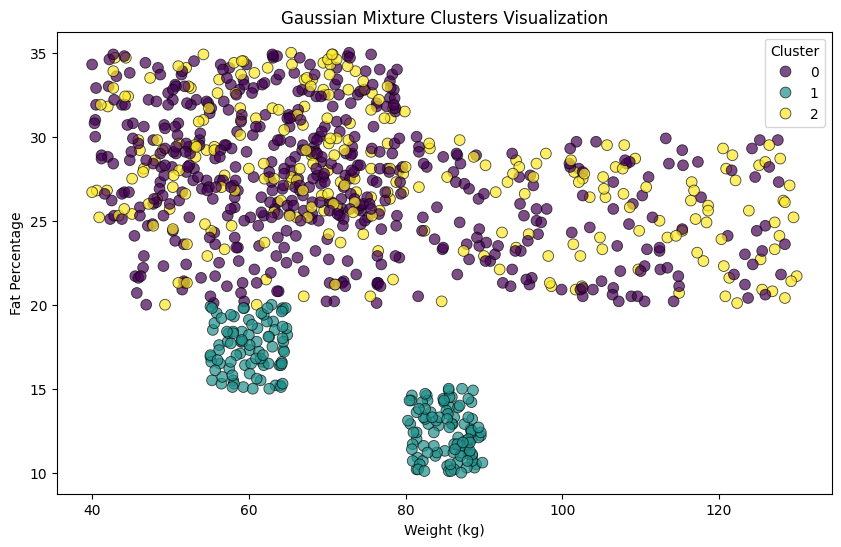

In [ ]:
from sklearn.mixture import GaussianMixture

auxdf = df[CONTINUOUS_FEATURES].copy()
gm = GaussianMixture(n_components=3, random_state=0).fit(df[CONTINUOUS_FEATURES])
auxdf['Gaussian Mix'] = gm.predict(df[CONTINUOUS_FEATURES])
print(auxdf['Gaussian Mix'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=auxdf['Gaussian Mix'], palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("Gaussian Mixture Clusters Visualization")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

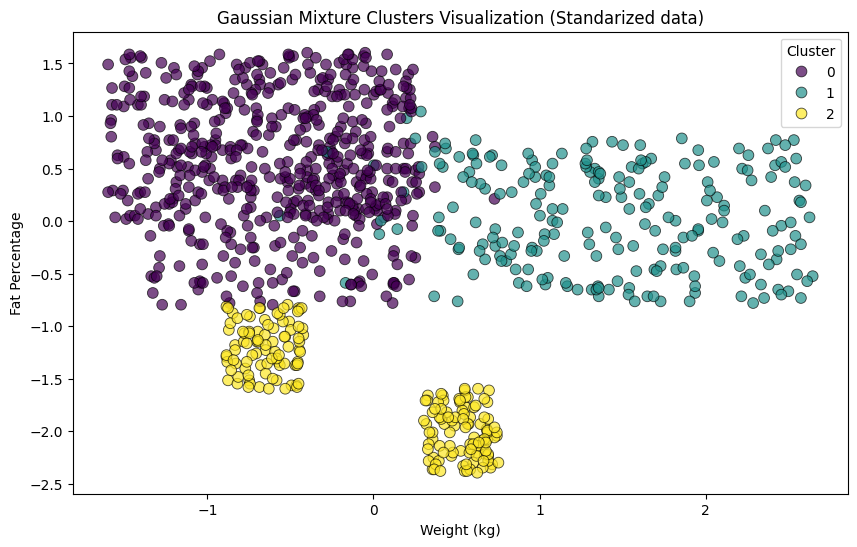

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

auxdf = df[CONTINUOUS_FEATURES].copy()
scaler = StandardScaler()
scaler.fit(df[CONTINUOUS_FEATURES])
auxdf[CONTINUOUS_FEATURES] = scaler.transform(df[CONTINUOUS_FEATURES])
gm = GaussianMixture(n_components=3, random_state=0).fit(auxdf[CONTINUOUS_FEATURES])
auxdf['Gaussian Mix'] = gm.predict(auxdf[CONTINUOUS_FEATURES])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=auxdf['Gaussian Mix'], palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("Gaussian Mixture Clusters Visualization (Standarized data)")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

### The Gaussian Mixture clustered the data similarly in a way similar to KMeans

# Outlier detection

## OneClass SVM

In [ ]:
from collections import Counter

In [ ]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma='auto', nu=0.05).fit(df[CONTINUOUS_FEATURES])
svmPrediction = clf.predict(df[CONTINUOUS_FEATURES])
count = Counter(svmPrediction)
print(count)

Counter({-1: 804, 1: 169})


Counter({1: 937, -1: 36})


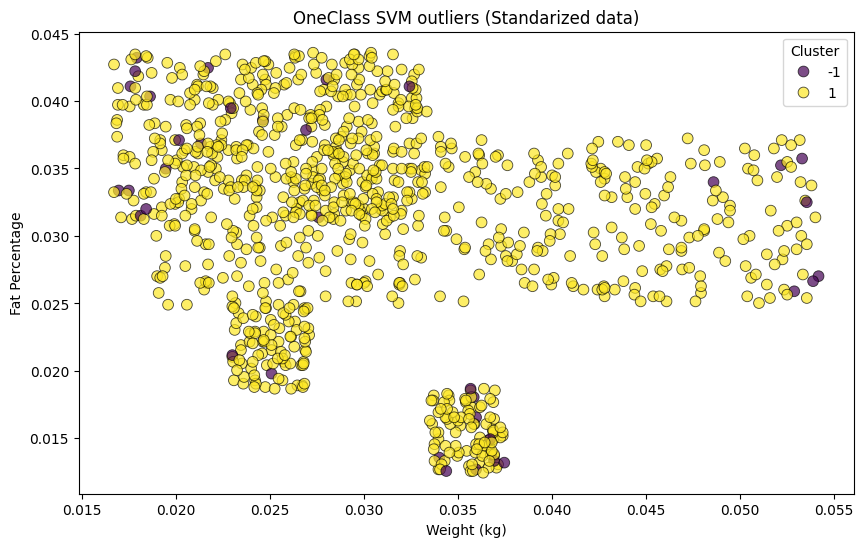

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import normalize

auxdf = df[CONTINUOUS_FEATURES].copy()
auxdf[CONTINUOUS_FEATURES] = normalize(df[CONTINUOUS_FEATURES], axis=0)
clf = OneClassSVM(gamma='auto', nu=0.05).fit(auxdf[CONTINUOUS_FEATURES])
svmPrediction = clf.predict(auxdf[CONTINUOUS_FEATURES])
count = Counter(svmPrediction)
print(count)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=svmPrediction, palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("OneClass SVM outliers (Standarized data)")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

### After normalizing the data we can see that the amount of samples classified as outliers reduced significantly. That is because SVMs are sensitive to feature magnitudes.

## Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=2)
localPrediction =  clf.fit_predict(df[CONTINUOUS_FEATURES])
count = Counter(localPrediction)
print(count)

Counter({1: 959, -1: 14})


Counter({1: 962, -1: 11})


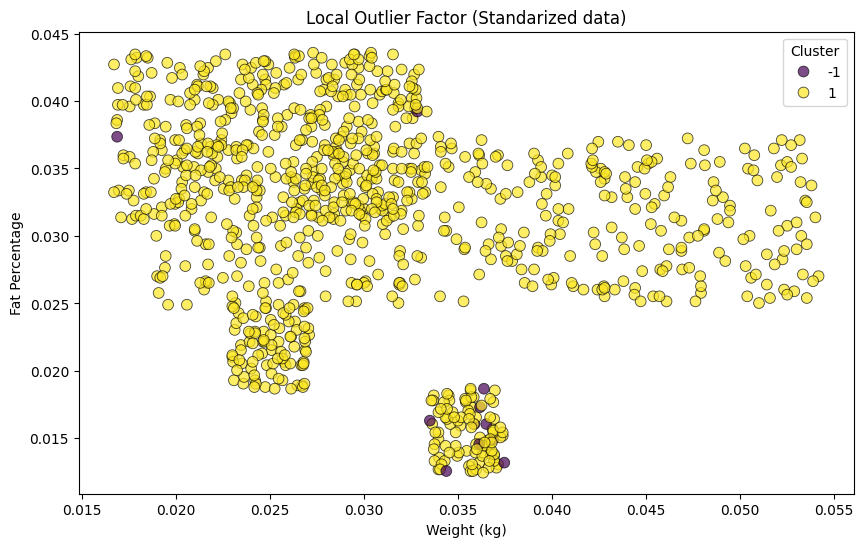

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize

auxdf = df[CONTINUOUS_FEATURES].copy()
auxdf[CONTINUOUS_FEATURES] = normalize(df[CONTINUOUS_FEATURES], axis=0)
clf = LocalOutlierFactor(n_neighbors=2)
localPrediction = clf.fit_predict(auxdf[CONTINUOUS_FEATURES])
count = Counter(localPrediction)
print(count)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=localPrediction, palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("Local Outlier Factor (Standarized data)")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

### Local Outlier Factor didn't change much after normalizing the data. This result make sense considering that it is based on density, which does not change with normalization. It also identified less outliers than One Class SVM, probably because the latest is more affected by datasets with clusters with varying densities.

## Isolation Forest

Counter({1: 594, -1: 379})


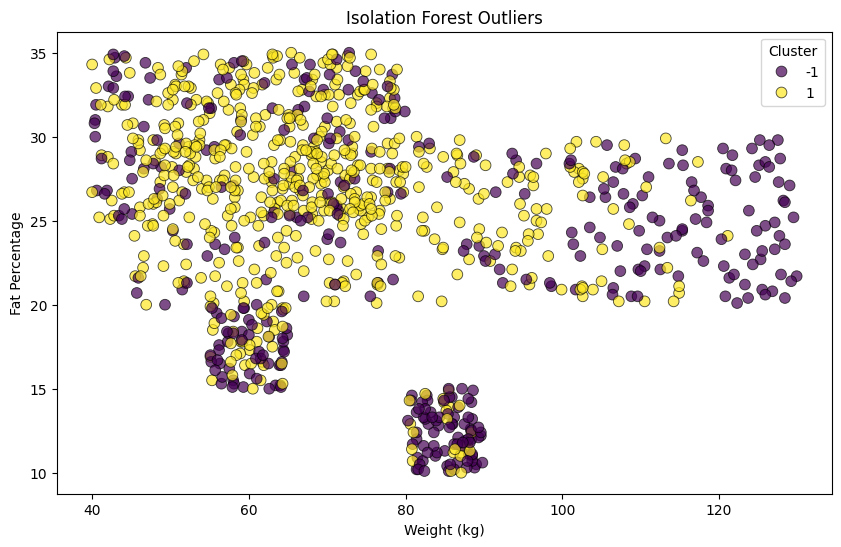

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=200).fit(df[CONTINUOUS_FEATURES])
ifPrediction = clf.predict(df[CONTINUOUS_FEATURES])
count = Counter(ifPrediction)
print(count)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Weight (kg)'], y=df['Fat_Percentage'], hue=ifPrediction, palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("Isolation Forest Outliers")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

Counter({1: 622, -1: 351})


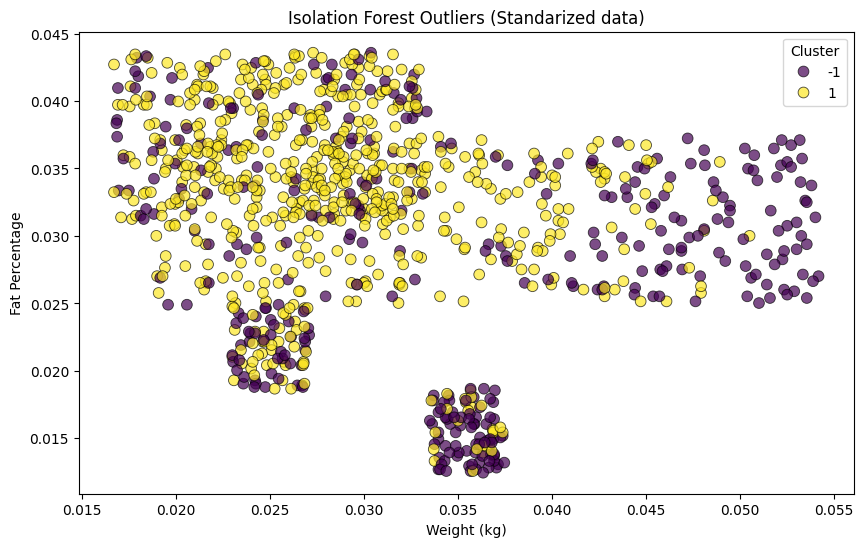

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import normalize

auxdf = df[CONTINUOUS_FEATURES].copy()
auxdf[CONTINUOUS_FEATURES] = normalize(df[CONTINUOUS_FEATURES], axis=0)
clf = IsolationForest(n_estimators=200).fit(auxdf[CONTINUOUS_FEATURES])
ifPrediction = clf.predict(auxdf[CONTINUOUS_FEATURES])
count = Counter(ifPrediction)
print(count)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=auxdf['Weight (kg)'], y=auxdf['Fat_Percentage'], hue=ifPrediction, palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title("Isolation Forest Outliers (Standarized data)")
plt.xlabel("Weight (kg)")
plt.ylabel("Fat Percentage")
plt.legend(title='Cluster')
plt.show()

### For Isolation Forest, normalization made no difference, and also identified much more outliers than the other methods.